### Importar Librerías

In [62]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### Importar datos de donantes

In [50]:
# Importar datos
df_donantesi = pd.read_csv('./Archivos_Cliente/Base_donantes.csv', encoding='latin-1')
df_donantesi.set_index('PSN', inplace=True)
display(df_donantesi.head())
print(f'Las dimensiones de la base completa de donantes son: {df_donantesi.shape}')

/var/folders/xq/zz5zb6z90_73_lf9wzs007h40000gn/T/ipykernel_83698/1346338774.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_donantesi = pd.read_csv('./Archivos_Cliente/Base_donantes.csv', encoding='latin-1')


,Tipo de registro del contacto,Fecha de nacimiento,Fecha Aniversario Pago,Edad,Fecha de Captación,Monto Actual,Género,Estado Civil,Cantidad de Hijos,Tiene hijos,Ocupación,Churn Probability,Lapsed Probability,RFM Segmento Actual,Otra Clasificación RFM Actual,Cantidad Cuotas Pagadas Global,Cantidad Cuotas No Pagadas Global,Campaña Inicial: Nombre,Donante Activo
PSN,,,,,,,,,,,,,,,,,,,
1020438646,Donante,1/12/1994,NaN,29.0,10/26/2018,NaN,Femenino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,0
1020276703,Donante,11/7/1990,Nº de error,32.0,12/29/2015,20000.0,Femenino,Soltero,NaN,No,Tecnólogo,NaN,NaN,Otra Clasificación,Extraviados,12,80,SPIF F2F 2016,0
1020490284,Donante,9/29/1994,3/1/2023,28.0,2/18/2023,30000.0,Femenino,NaN,1,Si,NaN,0.56,51.0,Otra Clasificación,Constantes,3,0,COF2FR.F.2023,0
1020184782,Donante,8/13/1973,10/31/2023,49.0,6/24/2015,20000.0,Masculino,Soltero,1,Si,NaN,NaN,NaN,Otra Clasificación,Extraviados,12,12,SPIF F2F 2015,0
1020476125,Donante,9/6/1986,NaN,36.0,4/13/2022,30000.0,Femenino,Soltero,2,Si,Asesor de gestión,NaN,NaN,NaN,NaN,0,2,COWCB R.F.2022,0


Las dimensiones de la base completa de donantes son: (99594, 19)


Se puede ver a primera vista que la base posee varios valores nulos en diferentes columnas, sin embargo, todo es debido a que puede que el dato no haga sentido y por esta razón no se calcula. A continuación se hará la respectiva transformación y filtrado de los datos según las reglas de negocio para que haga sentido el análisis.

#### Preprocesamiento de Datos

In [51]:
# Remover los registros que tienen "N° de error" en la columna Fecha Aniversario Pago
df_donantesi = df_donantesi[df_donantesi['Fecha Aniversario Pago']!='Nº de error']
# Remover los registros inactivos
df_donantesi = df_donantesi[df_donantesi['Donante Activo']==1]
# Remover registros menores de edad
df_donantesi = df_donantesi[df_donantesi['Edad']>=18]
# Remover registros mayores de 90 años
df_donantesi = df_donantesi[df_donantesi['Edad']<=90]
# Reemplazar textos de la cantidad de hijos
df_donantesi['Cantidad de Hijos'] = df_donantesi['Cantidad de Hijos'].replace('mas de 10', 10)
df_donantesi['Cantidad de Hijos'] = df_donantesi['Cantidad de Hijos'].astype(float)
# Llenar faltantes de tiene hijos
df_donantesi['Tiene hijos'] = np.where(df_donantesi['Cantidad de Hijos']>0.0, 'Si', 'No')
# Llenar faltantes de cantidad de hijos
df_donantesi['Cantidad de Hijos'] = np.where(df_donantesi['Tiene hijos']=='No', 0, df_donantesi['Cantidad de Hijos'])
# Cambiar tipos de dato
df_donantesi['Fecha de Captación'] = pd.to_datetime(df_donantesi['Fecha de Captación'])
df_donantesi['Tipo de registro del contacto'] = df_donantesi['Tipo de registro del contacto'].astype('category')
df_donantesi['Fecha de nacimiento'] = pd.to_datetime(df_donantesi['Fecha de nacimiento'])
df_donantesi['Fecha Aniversario Pago'] = pd.to_datetime(df_donantesi['Fecha Aniversario Pago'])
df_donantesi['Género'] = df_donantesi['Género'].astype('category')
df_donantesi['Estado Civil'] = df_donantesi['Estado Civil'].astype('category')
df_donantesi['Tiene hijos'] = df_donantesi['Tiene hijos'].astype('category')
# Reemplazar NaNs en Fecha Aniversario Pago con la Fecha de Captacion
df_donantesi['Fecha Aniversario Pago'] = np.where(df_donantesi['Fecha Aniversario Pago'].isna(), df_donantesi['Fecha de Captación'], df_donantesi['Fecha Aniversario Pago'])
# Cambiar el año de Fecha Aniversario Pago por 2023
df_donantesi['Fecha Aniversario Pago'] = df_donantesi['Fecha Aniversario Pago'].apply(lambda x: x.replace(year=2023))
# Obtener mes de la fecha actual
today = dt.datetime.now().month
# Remover registros con menos de 3 meses de fecha de captación
df_donantesi = df_donantesi[df_donantesi['Fecha de Captación']<dt.datetime(2023, today-3, 1) - dt.timedelta(days=90)]
# Corregir Churn Probability
df_donantesi['Churn Probability'] = np.where(df_donantesi['Churn Probability']>1, df_donantesi['Churn Probability']/100, df_donantesi['Churn Probability'])
# Corregir Lapsed Probability
df_donantesi['Lapsed Probability'] = np.where(df_donantesi['Lapsed Probability']>1, df_donantesi['Lapsed Probability']/100, df_donantesi['Lapsed Probability'])

# Ver la base después de las transformaciones
display(df_donantesi.head())
print(f'Las dimensiones de la base completa de donantes después de las transformaciones son: {df_donantesi.shape}')


,Tipo de registro del contacto,Fecha de nacimiento,Fecha Aniversario Pago,Edad,Fecha de Captación,Monto Actual,Género,Estado Civil,Cantidad de Hijos,Tiene hijos,Ocupación,Churn Probability,Lapsed Probability,RFM Segmento Actual,Otra Clasificación RFM Actual,Cantidad Cuotas Pagadas Global,Cantidad Cuotas No Pagadas Global,Campaña Inicial: Nombre,Donante Activo
PSN,,,,,,,,,,,,,,,,,,,
1020456818,Donante,1964-06-16,2023-07-01,59.0,2021-06-19,30000.0,Masculino,Casado,0.0,No,NaN,0.59,0.0,Otra Clasificación,Constantes,26,0,COF2FR.F. 2021,1
1020483942,Donante,1975-08-28,2023-10-01,47.0,2022-10-01,50000.0,Femenino,Casado,1.0,Si,Politico,0.78,0.0,Otra Clasificación,Constantes,10,0,COWCB R.F.2022,1
1020276927,Donante,1941-09-23,2023-01-31,81.0,2015-12-29,20000.0,Masculino,Casado,2.0,Si,Jubilado,0.53,0.0,Otra Clasificación,Constantes,81,10,SPIF F2F 2016,1
1020476173,Donante,1988-10-28,2023-04-18,34.0,2022-04-17,30000.0,Femenino,Soltero,0.0,No,Ingeniero,0.95,0.0,Otra Clasificación,Constantes,16,0,COF2FR.F.2022,1
1020483943,Donante,1982-04-22,2023-10-01,41.0,2022-10-01,30000.0,Femenino,Casado,2.0,Si,Empleado,0.92,0.0,Otra Clasificación,Constantes,10,0,COWCB R.F.2022,1


Las dimensiones de la base completa de donantes después de las transformaciones son: (23086, 19)


In [52]:
# Evaluar datos faltantes
for col in df_donantesi.columns:
    if df_donantesi[col].isna().sum()>0:
        print(f'La columna {col} tiene {df_donantesi[col].isna().sum()}')

La columna Género tiene 400
La columna Estado Civil tiene 2428
La columna Ocupación tiene 4672
La columna Churn Probability tiene 187
La columna Lapsed Probability tiene 187
La columna RFM Segmento Actual tiene 213
La columna Otra Clasificación RFM Actual tiene 213
La columna Campaña Inicial: Nombre tiene 122


#### Análisis descriptivo de la base de donantes

In [66]:
# Funciones
def tab_col(col:str, df:pd.DataFrame):
    """Función que imprime una tabla de frecuencias y porcentajes de una columna de un DataFrame.
    
    Args:
        col (str): Nombre de la columna a analizar.
        df (pd.DataFrame): DataFrame que contiene la columna a analizar.
    """
    # Obtener descripción de la columna
    desc = df[col].describe().round(2)
    # Renombrar campos
    desc.rename(index={'mean': 'Promedio', 'std': 'Desviación Estándar', 'min': 'Mínimo', '25%': 'Percentil 25%', '50%': 'Mediana', '75%': 'Percentil 75%', 'max': 'Máximo'}, inplace=True)
    desc = pd.DataFrame(desc)
    # Tabular descripción
    tabla_desc = tabulate(desc, headers='keys', tablefmt='pretty', showindex=True)
    print(tabla_desc)

In [20]:
df_donantesi.describe()

,Fecha de nacimiento,Fecha Aniversario Pago,Edad,Fecha de Captación,Monto Actual,Cantidad de Hijos,Churn Probability,Lapsed Probability,Cantidad Cuotas Pagadas Global,Cantidad Cuotas No Pagadas Global,Donante Activo
count,23086,23086,23086.000000,23086,2.308600e+04,23086.000000,22899.000000,22899.000000,23086.000000,23086.000000,23086.0
mean,1980-10-07 07:28:40.003465280,2023-07-05 22:48:31.062981888,42.314216,2019-04-30 08:32:47.322186496,3.671120e+04,1.146063,0.364520,0.063311,44.979338,6.466690,1.0
min,1932-10-11 00:00:00,2023-01-01 00:00:00,18.000000,2004-04-22 00:00:00,1.667000e+03,0.000000,0.010100,0.000000,0.000000,0.000000,1.0
25%,1975-07-01 00:00:00,2023-04-01 00:00:00,34.000000,2016-11-18 06:00:00,3.000000e+04,0.000000,0.033400,0.000000,13.000000,0.000000,1.0
50%,1982-08-28 00:00:00,2023-07-05 00:00:00,40.000000,2020-03-07 00:00:00,3.000000e+04,1.000000,0.340000,0.000000,29.000000,2.000000,1.0
75%,1989-01-05 00:00:00,2023-10-02 00:00:00,48.000000,2022-03-12 00:00:00,5.000000e+04,2.000000,0.570000,0.000000,67.000000,8.000000,1.0
max,2004-12-21 00:00:00,2023-12-31 00:00:00,90.000000,2023-03-02 00:00:00,4.500000e+06,10.000000,1.000000,0.881500,358.000000,118.000000,1.0
std,NaN,NaN,11.981736,NaN,4.278834e+04,1.034126,0.289583,0.174487,43.195350,11.326489,0.0


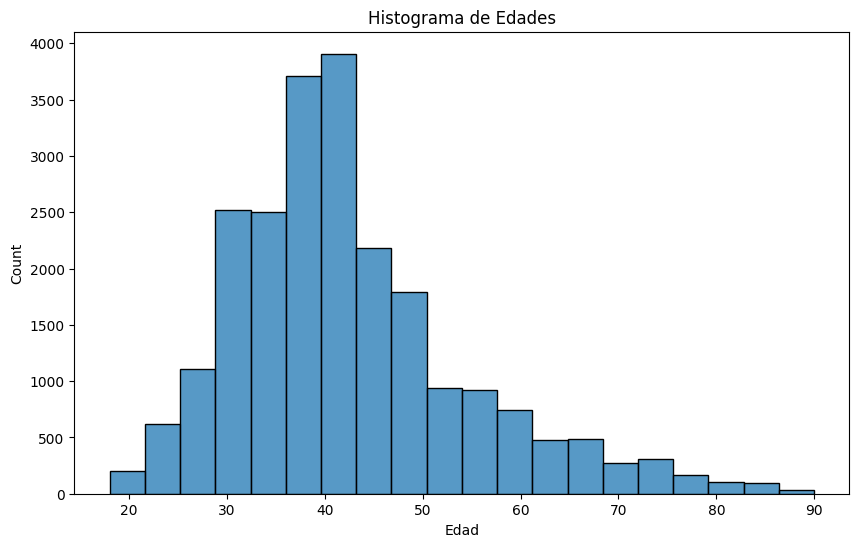

In [21]:
# Graficar histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=df_donantesi, x='Edad', bins=20)
plt.title('Histograma de Edades')
plt.show()

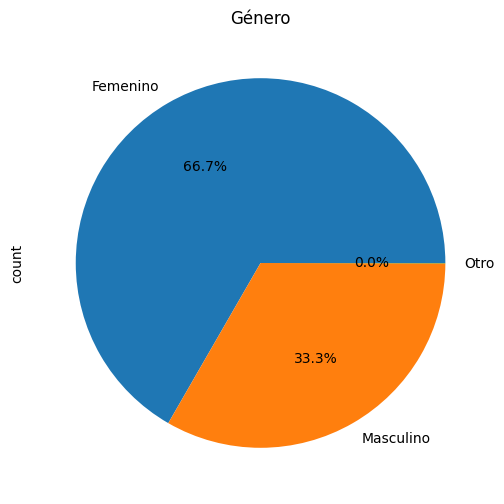

In [22]:
# Grafica de pie para el género
plt.figure(figsize=(10, 6))
df_donantesi['Género'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Género')
plt.show()

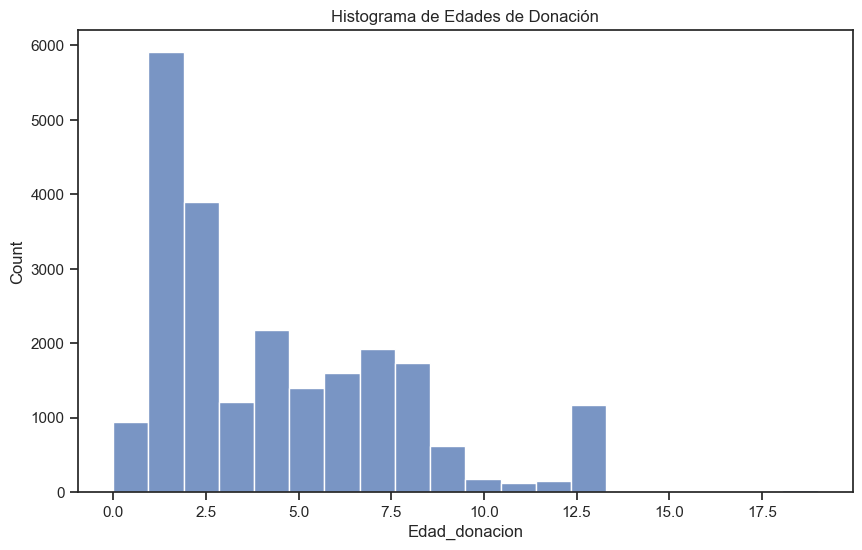

+---------------------+---------------+
|                     | Edad_donacion |
+---------------------+---------------+
|        count        |    23086.0    |
|      Promedio       |     4.19      |
| Desviación Estándar |     3.49      |
|       Mínimo        |      0.0      |
|    Percentil 25%    |      1.0      |
|       Mediana       |      3.0      |
|    Percentil 75%    |      7.0      |
|       Máximo        |     19.0      |
+---------------------+---------------+


In [67]:
# Calcular edad del donante
df_donantesi['Edad_donacion'] = dt.datetime.now().year - df_donantesi['Fecha de Captación'].dt.year
# Graficar histograma de edades de donacion
plt.figure(figsize=(10, 6))
sns.histplot(data=df_donantesi, x='Edad_donacion', bins=20)
plt.title('Histograma de Edades de Donación')
plt.show()

# Tabular edad de donación
tab_col('Edad_donacion', df_donantesi)

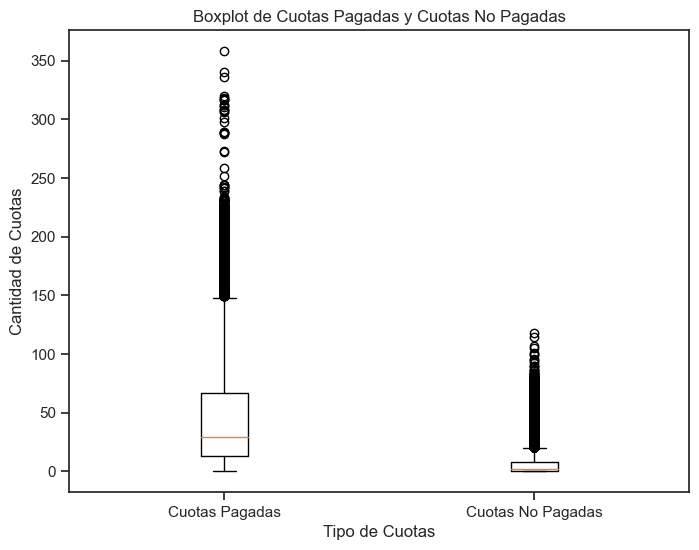

+---------------------+--------------------------------+-----------------------------------+
|                     | Cantidad Cuotas Pagadas Global | Cantidad Cuotas No Pagadas Global |
+---------------------+--------------------------------+-----------------------------------+
|        count        |            23086.0             |              23086.0              |
|      Promedio       |             44.98              |               6.47                |
| Desviación Estándar |              43.2              |               11.33               |
|       Mínimo        |              0.0               |                0.0                |
|    Percentil 25%    |              13.0              |                0.0                |
|       Mediana       |              29.0              |                2.0                |
|    Percentil 75%    |              67.0              |                8.0                |
|       Máximo        |             358.0              |              

In [69]:
# Crear el boxplot para cantidad de cuotas pagadas y no pagadas
plt.figure(figsize=(8, 6))
plt.boxplot([df_donantesi['Cantidad Cuotas Pagadas Global'], df_donantesi['Cantidad Cuotas No Pagadas Global']],
            labels=['Cuotas Pagadas', 'Cuotas No Pagadas'])

# Agregar etiquetas y título
plt.xlabel('Tipo de Cuotas')
plt.ylabel('Cantidad de Cuotas')
plt.title('Boxplot de Cuotas Pagadas y Cuotas No Pagadas')

# Mostrar el boxplot
plt.show()

columnas_interes = ['Cantidad Cuotas Pagadas Global', 'Cantidad Cuotas No Pagadas Global']

# Calcular estadísticas descriptivas con dos decimales
tab_col(columnas_interes, df_donantesi)

<Figure size 1000x600 with 0 Axes>

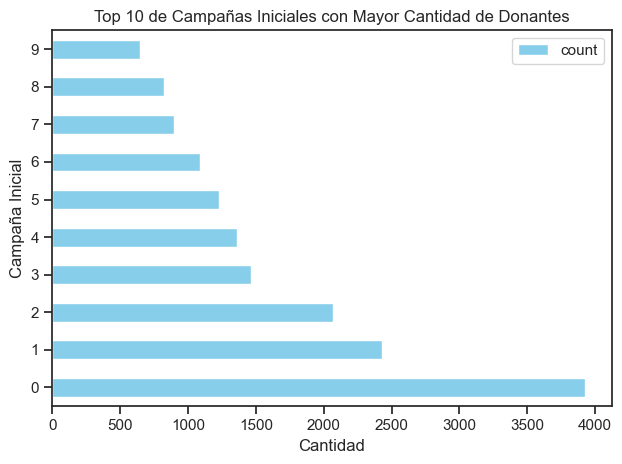

El total de campañas totales es: 98


In [76]:
# Top 10 campañas iniciales con mayor cantidad de donantes
top10_campanias = df_donantesi['Campaña Inicial: Nombre'].value_counts().head(10)
top10_campanias = pd.DataFrame(top10_campanias)
top10_campanias.reset_index(inplace=True)
top10_campanias.rename(columns={'Monto Actual': 'Promedio de Donación'}, inplace=True)
top10_campanias

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
top10_campanias.plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad')
plt.ylabel('Campaña Inicial')
plt.title('Top 10 de Campañas Iniciales con Mayor Cantidad de Donantes')
plt.tight_layout()
plt.show()

print(f'El total de campañas totales es: {df_donantesi["Campaña Inicial: Nombre"].nunique()}')

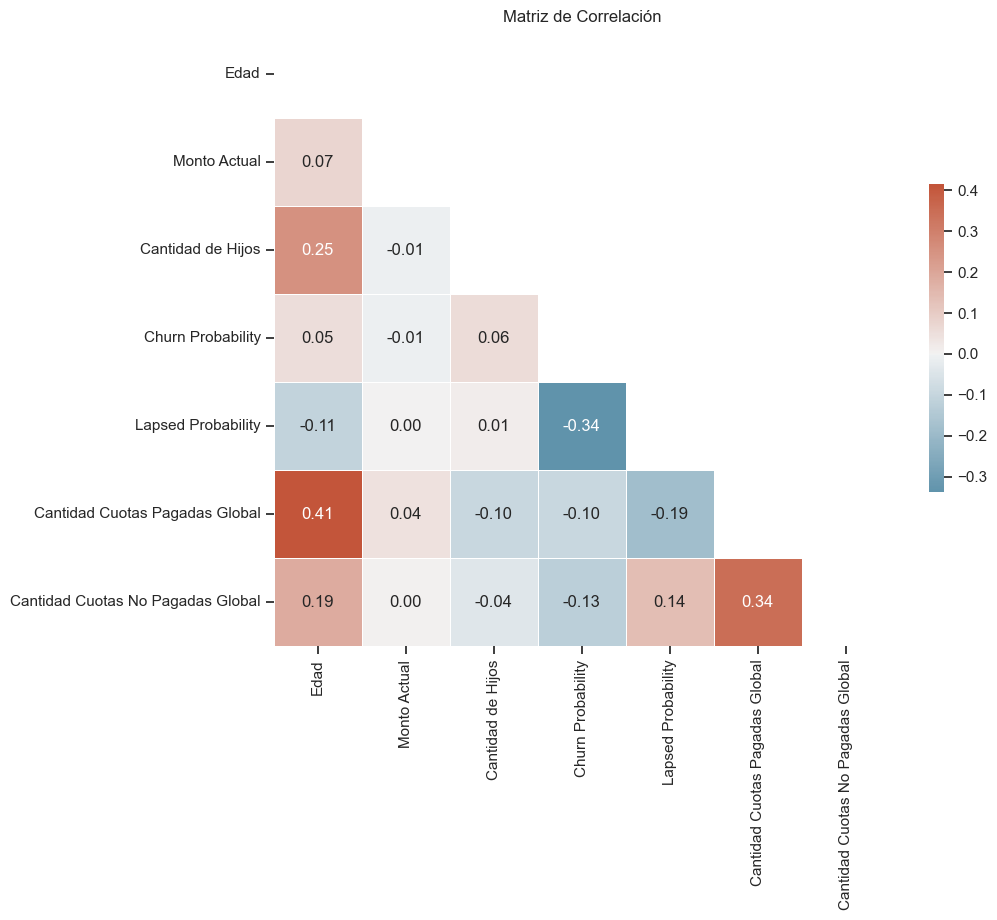

In [80]:
columnas_interes = ['Edad', 'Monto Actual', 'Cantidad de Hijos', 'Churn Probability', 'Lapsed Probability', 'Cantidad Cuotas Pagadas Global', 'Cantidad Cuotas No Pagadas Global']

# Crear la matriz de correlación
corr = df_donantesi[columnas_interes].corr()

# Crear la máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crear la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Agregar título
plt.title('Matriz de Correlación')

# Mostrar el heatmap
plt.show()

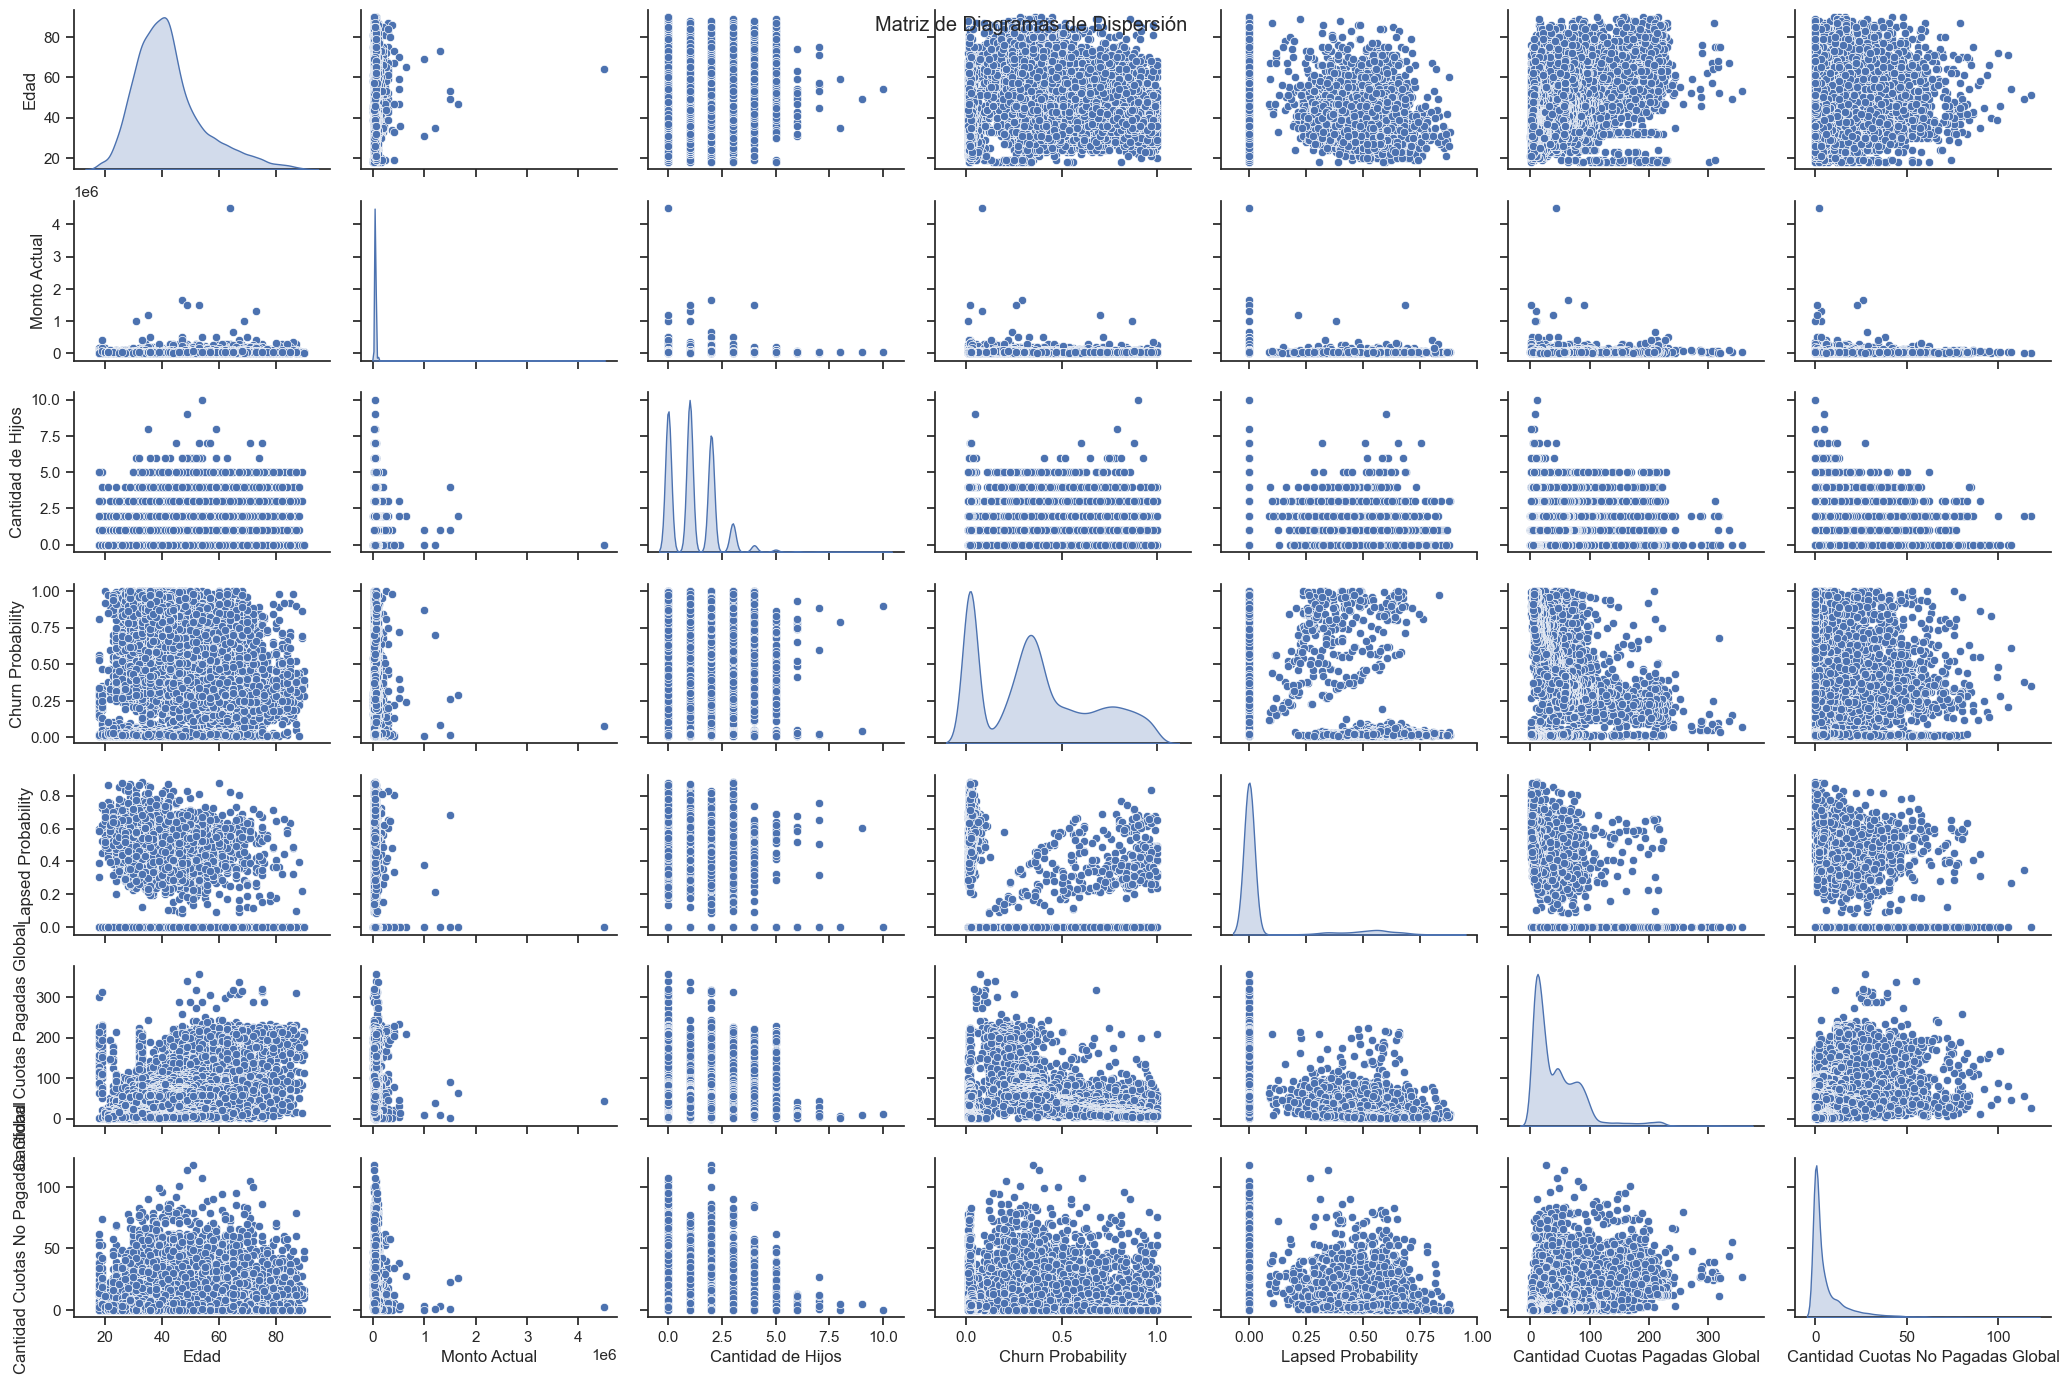

In [81]:
# Crear una matriz de gráficos de dispersión
sns.set(style="ticks")
sns.pairplot(df_donantesi[columnas_interes], diag_kind='kde', markers='o', height=2, aspect=1.5)

# Agregar título
plt.suptitle('Matriz de Diagramas de Dispersión')

# Mostrar el gráfico
plt.show()

#### Exploración Datos de Transacciones

#### Importar datos

In [82]:
# Importar datos de transacciones individuales
df_transi = pd.read_csv('./Archivos_Cliente/Transacciones_Individuales.csv', sep=';', encoding='latin-1')
display(df_transi.head())
print(f'Las dimensiones de la base de transacciones son: {df_transi.shape}')

,PSN,Etapa,Fecha de Donación,Importe,Canal de la Campaña,Tipo de registro,Medio de Pago,Tipo de Compromiso,Fecha de Registro Contable,Fecha efectiva de primer cobro,Fecha de última donación,Estado/Tipo
0,1020449841,Perdida,18/01/2021,"30000,00",Click to Call,DI - Regular,Débito Automático,Primer Compromiso,NaN,18/08/2020,10/10/2021,Abierto
1,1020019970,Cobrada,1/02/2021,"15000,00",Multicanal,DI - Regular,Débito Automático,Primer Compromiso,1/02/2021,30/11/2015,1/07/2023,Abierto
2,1020355747,Perdida,27/02/2021,"20000,00",F2F,DI - Regular,Débito Automático,Primer Compromiso,NaN,27/02/2017,9/11/2021,Abierto
3,1020142210,Perdida,1/01/2021,"50000,00",F2F,PI - Padrinazgo individual,Débito Automático,Primer Compromiso,NaN,31/01/2015,NaN,Abierto
4,1020117113,Cobrada,1/01/2021,"30000,00",F2F,DI - Regular,Débito Automático,Primer Compromiso,4/01/2021,31/01/2015,1/01/2022,Cerrado


Las dimensiones de la base de transacciones son: (1348521, 12)


#### Dar formato a las columnas

In [83]:
# Cambiar tipos de dato
df_transi['Fecha de Donación'] = pd.to_datetime(df_transi['Fecha de Donación'])
df_transi['Etapa'] = df_transi['Etapa'].astype('category')
df_transi['Importe'] = df_transi['Importe'].str.replace(',','.')
df_transi['Importe'] = df_transi['Importe'].astype(float)
df_transi['Canal de la Campaña'] = df_transi['Canal de la Campaña'].astype('category')
df_transi['Tipo de registro'] = df_transi['Tipo de registro'].astype('category')
df_transi['Medio de Pago'] = df_transi['Medio de Pago'].astype('category')
df_transi['Tipo de Compromiso'] = df_transi['Tipo de Compromiso'].astype('category')
df_transi['Fecha de Registro Contable'] = pd.to_datetime(df_transi['Fecha de Registro Contable'], format='mixed')
df_transi['Fecha efectiva de primer cobro'] = pd.to_datetime(df_transi['Fecha efectiva de primer cobro'])
df_transi['Fecha de última donación'] = pd.to_datetime(df_transi['Fecha de última donación'], format='mixed')
df_transi['Estado/Tipo'] = df_transi['Estado/Tipo'].astype('category')


/var/folders/xq/zz5zb6z90_73_lf9wzs007h40000gn/T/ipykernel_83698/3824629097.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transi['Fecha de Donación'] = pd.to_datetime(df_transi['Fecha de Donación'])
/var/folders/xq/zz5zb6z90_73_lf9wzs007h40000gn/T/ipykernel_83698/3824629097.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transi['Fecha efectiva de primer cobro'] = pd.to_datetime(df_transi['Fecha efectiva de primer cobro'])


In [86]:
# Filtrar donaciones del futuro
df_trans_futuras = df_transi[df_transi['Fecha de Donación']>dt.datetime.now()]
cuenta_trans = pd.DataFrame(df_trans_futuras['Etapa'].value_counts())
cuenta_trans = tabulate(cuenta_trans, headers='keys', tablefmt='pretty', showindex=True)
print(cuenta_trans)

+------------------+--------+
|      Etapa       | count  |
+------------------+--------+
|   Comprometida   | 152203 |
|     Perdida      |  140   |
|     Eliminar     |   89   |
| Enviada a cobrar |   1    |
|     Cobrada      |   0    |
|    Rechazada     |   0    |
+------------------+--------+


Como se puede evidenciar en la tabla de resumen sobre transacciones en el futuro, ninguna ha sido cobrada por lo que se pueden eliminar estos datos para no generar confusiones

In [87]:
# Tipos de transacciones
etapas_trans = pd.DataFrame(df_transi['Etapa'].value_counts())
etapas_trans = tabulate(etapas_trans, headers='keys', tablefmt='pretty', showindex=True)
print(etapas_trans)

+------------------+--------+
|      Etapa       | count  |
+------------------+--------+
|     Cobrada      | 647701 |
|     Perdida      | 479267 |
|   Comprometida   | 203670 |
| Enviada a cobrar | 15269  |
|    Rechazada     |  2496  |
|     Eliminar     |  118   |
+------------------+--------+


In [43]:
# Filtrar transacciones efectivas
df_trans_cobradas = df_transi[df_transi['Etapa']=='Cobrada']
df_trans_cobradas.describe()

,PSN,Fecha de Donación,Importe,Fecha de Registro Contable,Fecha efectiva de primer cobro,Fecha de última donación
count,6.477010e+05,647701,6.477010e+05,647700,647351,647697
mean,1.020357e+09,2022-05-09 20:09:20.280747008,3.595167e+04,2022-02-10 18:50:41.007873280,2019-11-08 14:56:58.835222016,2022-11-15 10:27:10.662485504
min,1.020000e+09,2021-01-01 00:00:00,1.000000e+00,2021-01-01 00:00:00,2015-01-01 00:00:00,2021-01-01 00:00:00
25%,1.020281e+09,2021-10-01 00:00:00,2.000000e+04,2021-05-04 00:00:00,2018-03-01 00:00:00,2023-01-07 00:00:00
50%,1.020440e+09,2022-06-01 00:00:00,3.000000e+04,2022-01-11 00:00:00,2020-05-05 00:00:00,2023-01-07 00:00:00
75%,1.020458e+09,2023-01-01 00:00:00,5.000000e+04,2023-01-02 00:00:00,2021-11-05 00:00:00,2023-02-08 00:00:00
max,1.020497e+09,2023-08-02 00:00:00,2.782162e+07,2023-12-07 00:00:00,2023-07-30 00:00:00,2023-12-07 00:00:00
std,1.415426e+05,NaN,7.287671e+04,NaN,NaN,NaN


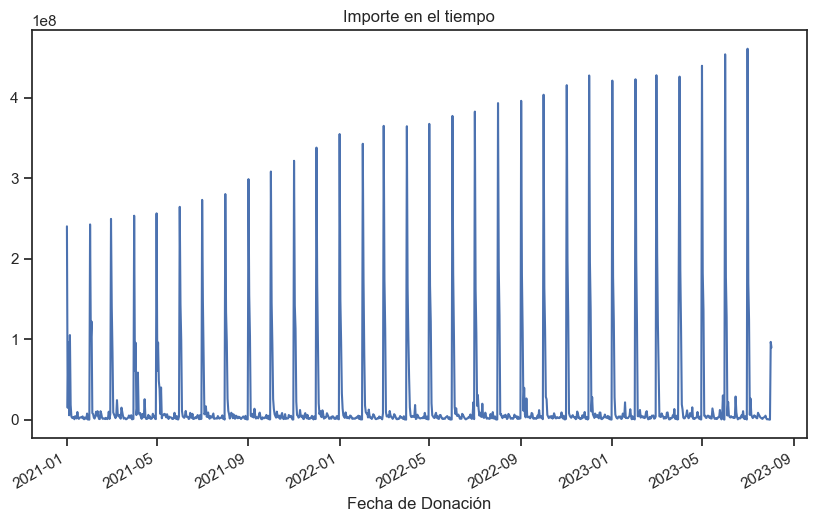

In [44]:
# Graficar de línea para el importe en el tiempo
plt.figure(figsize=(10, 6))
df_trans_cobradas.groupby('Fecha de Donación')['Importe'].sum().plot()
plt.title('Importe en el tiempo')
plt.show()

### Bases de donantes y transacciones juntas

In [93]:
# Unir las bases de transacciones y las de donantes
df = df_trans_cobradas.join(df_donantesi, on='PSN', how='inner')
df['Mes Donación'] = df['Fecha de Donación'].dt.month
df['Anio Donación'] = df['Fecha de Donación'].dt.year
# Tabla de donaciones anuales por donante
donaciones_anuales = pd.pivot_table(df, values='Importe', index='PSN', columns=['Anio Donación'], aggfunc='sum', fill_value=0)

# Agregar campo de género
donaciones_anuales = donaciones_anuales.join(df_donantesi['Género'], on='PSN', how='inner')
donaciones_anuales.head()

print(tabulate(donaciones_anuales.head(), headers='keys', tablefmt='pretty', showindex=True))

+------------+----------+----------+--------+-----------+
|    PSN     |   2021   |   2022   |  2023  |  Género   |
+------------+----------+----------+--------+-----------+
| 1020000012 | 540000.0 | 720000.0 | 420000 | Masculino |
| 1020000038 | 600000.0 | 550000.0 | 400000 | Femenino  |
| 1020000079 | 960000.0 | 960000.0 | 560000 | Masculino |
| 1020000087 | 300000.0 | 330000.0 | 300000 | Masculino |
| 1020000095 | 960000.0 | 960000.0 | 80000  | Femenino  |
+------------+----------+----------+--------+-----------+


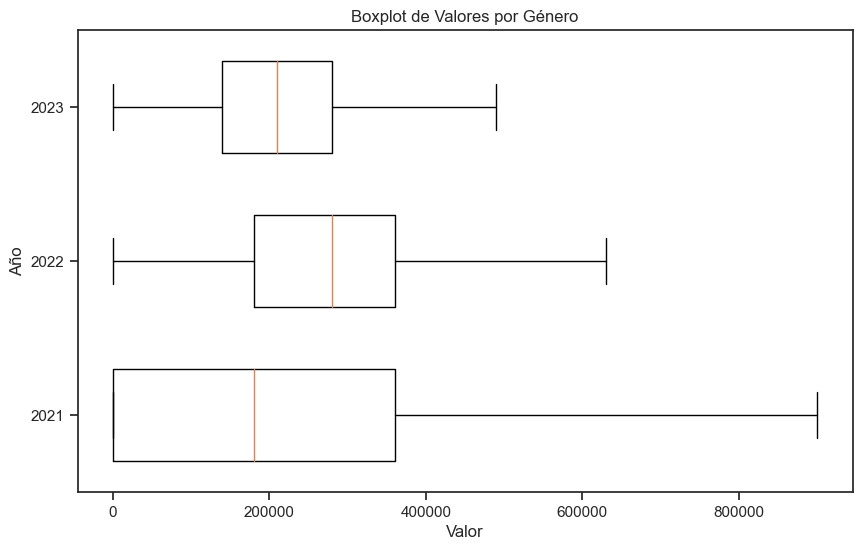

+---------------------+------------+------------+------------+
|                     |    2021    |    2022    |    2023    |
+---------------------+------------+------------+------------+
|        count        |  23070.0   |  23070.0   |  23070.0   |
|      Promedio       | 224663.83  | 321136.94  | 226455.76  |
| Desviación Estándar | 449864.58  | 346568.51  | 245791.24  |
|       Mínimo        |    0.0     |    0.0     |    0.0     |
|    Percentil 25%    |    0.0     |  180000.0  |  140000.0  |
|       Mediana       |  180000.0  |  280000.0  |  210000.0  |
|    Percentil 75%    |  360000.0  |  360000.0  |  280000.0  |
|       Máximo        | 46871003.0 | 19800000.0 | 19580000.0 |
+---------------------+------------+------------+------------+


In [102]:
# Boxplot por año
plt.figure(figsize=(10, 6))
plt.title('Boxplot de Valores por Género')
plt.xlabel('Valor')
plt.ylabel('Año')

# Filtrar los datos por género y año
for year in [2021,2022,2023]:
    subset = donaciones_anuales[year]
    plt.boxplot(subset, positions=[int(year)], widths=0.6, showfliers=False, vert=False)

plt.show()
tab_col([2021,2022,2023], donaciones_anuales)

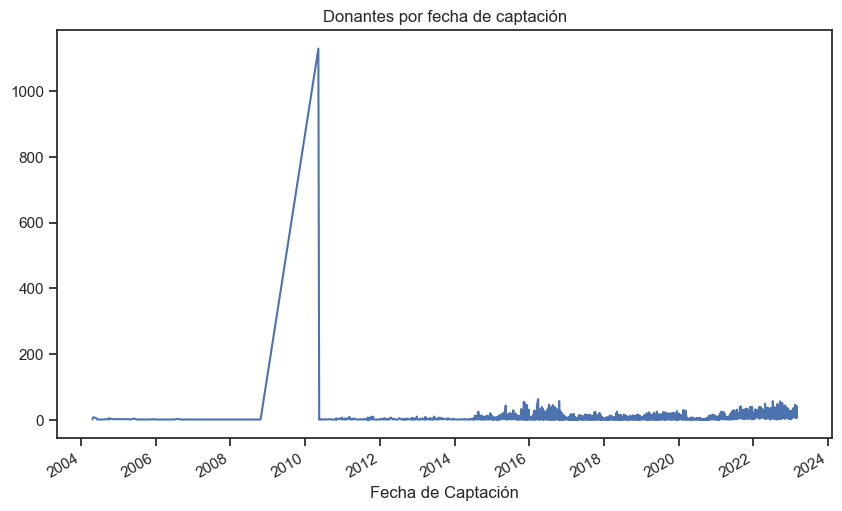

In [47]:
# Gráfica de donantes por fecha de captación
plt.figure(figsize=(10, 6))
df_donantesi.reset_index(inplace=True)
df_donantesi.groupby('Fecha de Captación')['PSN'].count().plot()
plt.title('Donantes por fecha de captación')
plt.show()

In [ ]:
def discretizacion_edades(x):
    if x < 30:
        return "Adulto Joven"
    elif x < 59:
        return "Adulto"
    else:
        return "Tercera Edad"

In [ ]:
df_donantesi["Segmento Edad"] = df_donantesi.Edad.apply(discretizacion_edades)

In [ ]:
donantes_transacciones = pd.merge(df_donantesi, df_transi, left_index=True, right_on="PSN")


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## ¿Cómo es la relación entre la edad y el importe?
<ul>
 <li>Si bien la mayor cantidad de donantes está concentrada entre 35 y 45 años, los montos de donaciones más altos están concentrados entre 60 y 65 años.</li>
 <li>No se observa un patrón claro entre la edad y el importe</li>
</ul>

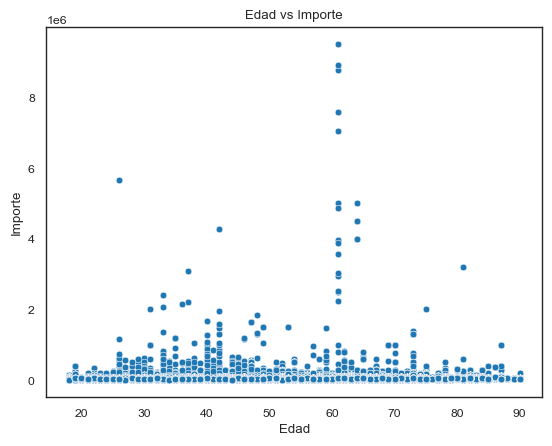

In [ ]:
sns.scatterplot(data=donantes_transacciones, x="Edad", y="Importe");
plt.title("Edad vs Importe");

## ¿La edad influye en la etapa de las transacciones?
<ul>
 <li>Parece que la edad no afecta el estado de las transacciones.</li>
 <li>Se confirma que los de la tercera edad tienen las donaciones promedio más altas</li>
</ul>

In [ ]:
 donantes_transacciones['Segmento Edad'] = pd.Categorical(donantes_transacciones['Segmento Edad'], categories=["Adulto Joven","Adulto","Tercera Edad"], ordered=True)

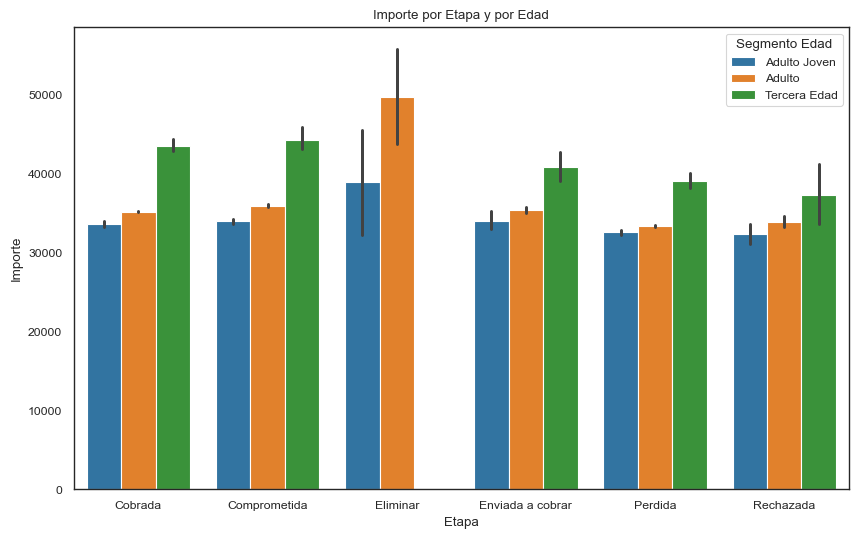

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=donantes_transacciones, x="Etapa", y="Importe", hue="Segmento Edad")
plt.title("Importe Promedio por Etapa y por Edad");

## ¿Tener hijos influye en el monto donado?
<ul>
 <li>La única diferencia que se observa entre los grupos es en las transacciones Eliminadas.</li>
</ul>

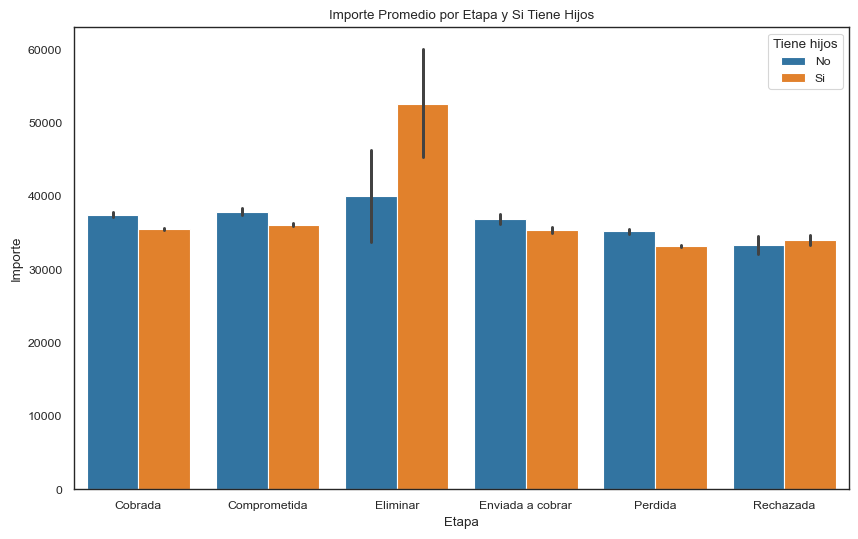

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=donantes_transacciones, x="Etapa", y="Importe", hue="Tiene hijos")
plt.title("Importe Promedio por Etapa y Si Tiene Hijos");

## ¿El sexo influye en el monto donado?
<ul>
 <li>Las donaciones son bastante homogéneas entre género</li>
</ul>

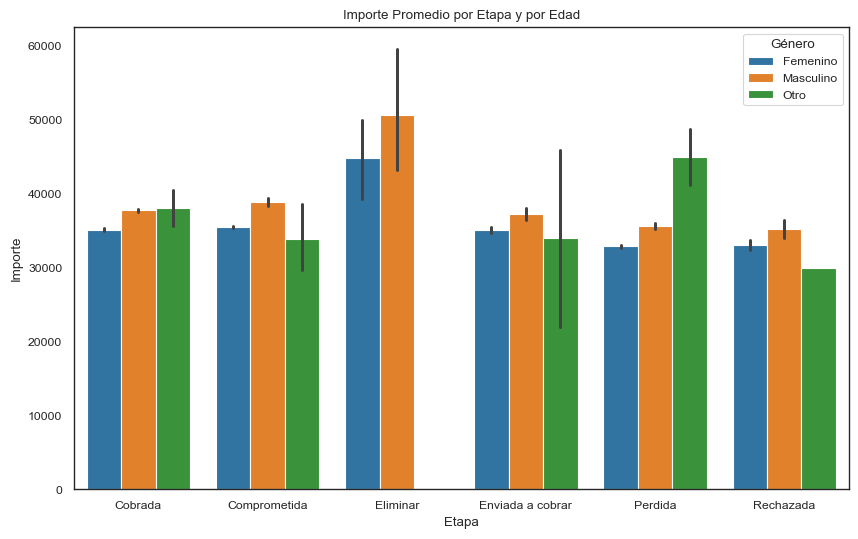

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=donantes_transacciones, x="Etapa", y="Importe", hue="Género")
plt.title("Importe Promedio por Etapa y por Edad");

## ¿El estado civil influye en el monto donado?
<ul>
 <li>No hay relación aparente entre estado civil e importe</li>
</ul>

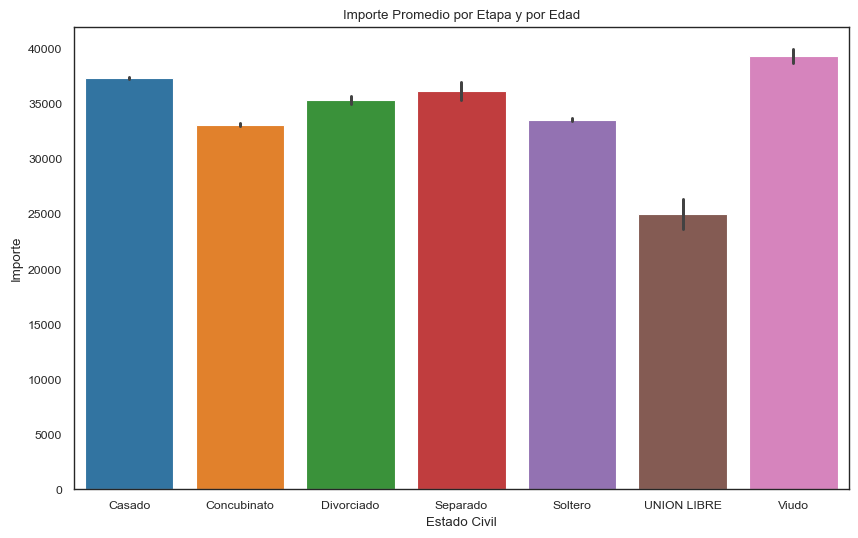

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=donantes_transacciones, x="Estado Civil", y="Importe")
plt.title("Importe Promedio por Etapa y por Edad");

## ¿La edad influye en la cantidad de cuotas pagadas y no pagadas?
<ul>
 <li>Parece que la edad no tiene incidencia en la cantidad de cuotas pagadas y no pagadas</li>
</ul>

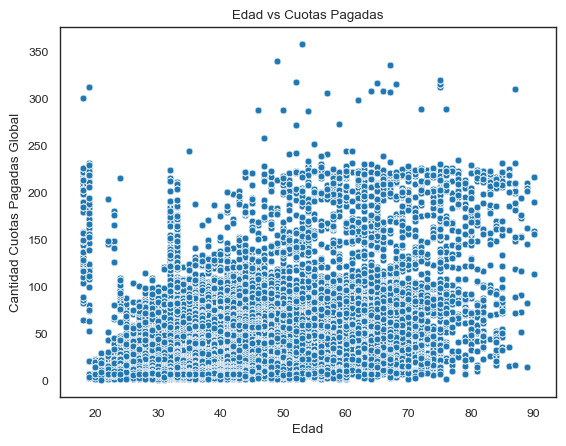

In [ ]:
sns.scatterplot(data=donantes_transacciones, x="Edad", y="Cantidad Cuotas Pagadas Global");
plt.title("Edad vs Cuotas Pagadas");

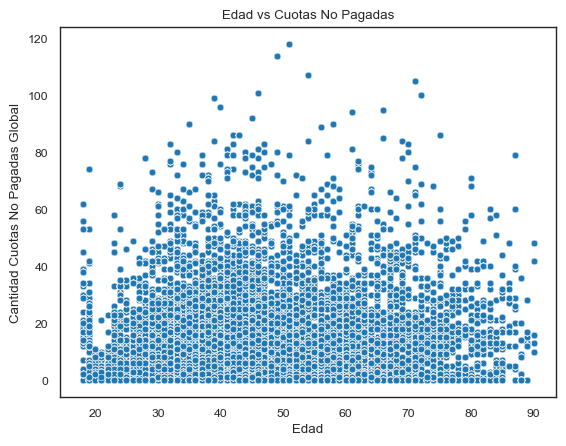

In [ ]:
sns.scatterplot(data=donantes_transacciones, x="Edad", y="Cantidad Cuotas No Pagadas Global")
plt.title("Edad vs Cuotas No Pagadas");

## ¿Cómo se distribuyen los medios de pago por edad??
<ul>
 <li>Las distribuciones no cambian por edad, los únicos medios de pago que tienen un uso frecuente son débito automático y Tarjeta de Crédito</li>
</ul>

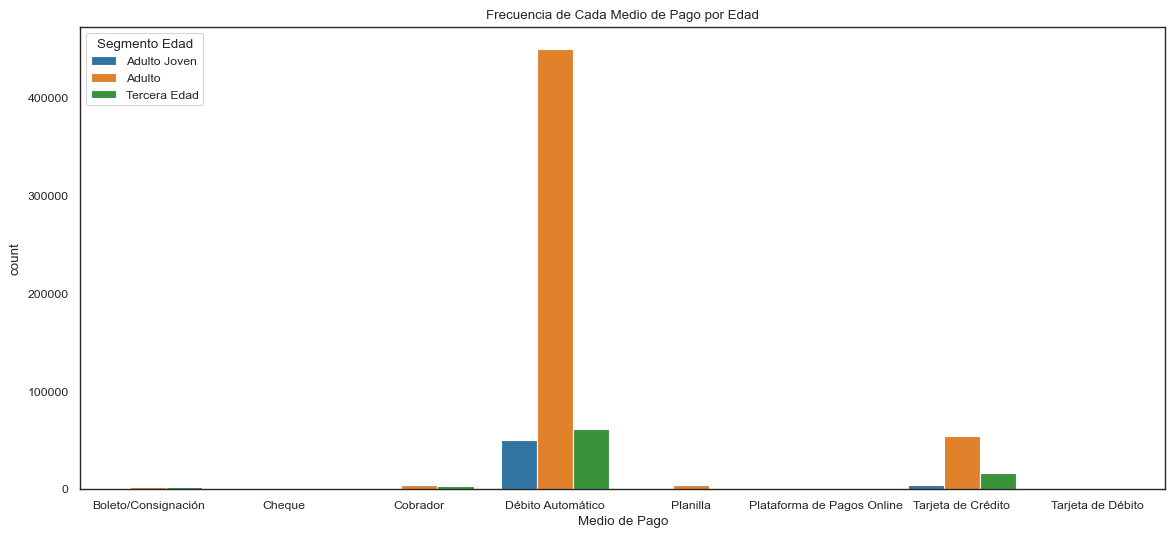

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(data=donantes_transacciones, x="Medio de Pago", hue="Segmento Edad")
plt.title("Frecuencia de Cada Medio de Pago por Edad");

## ¿La edad influye en el tipo de campaña de captación?
<ul>
 <li>F2F es el más frecuente para todas las edades</li>
  <li>Parece que el tipo multicanal es más efectivo en la tercera edad</li>

</ul>

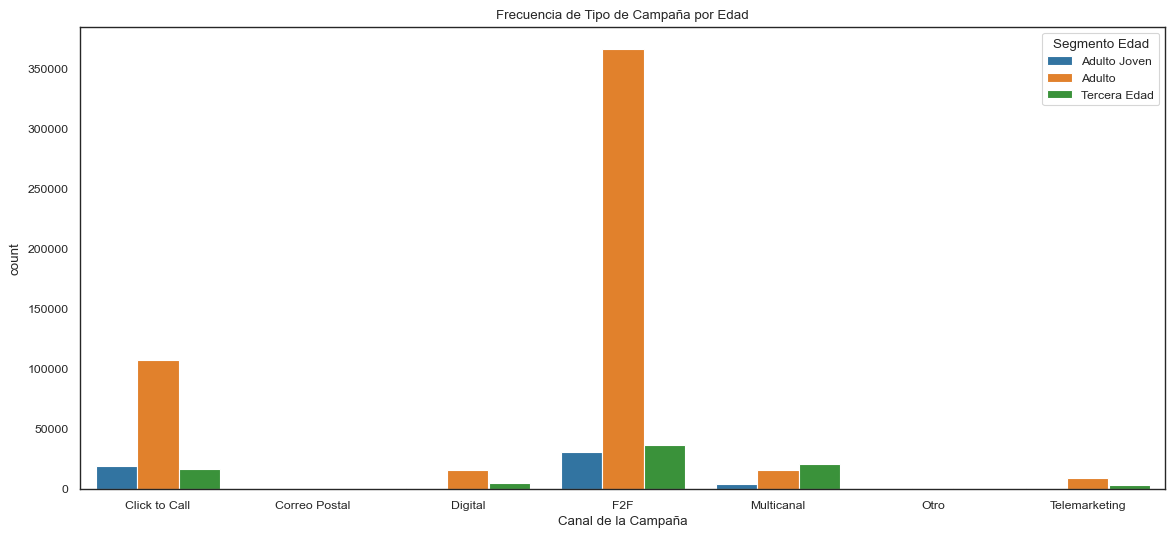

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(data=donantes_transacciones, x="Canal de la Campaña", hue="Segmento Edad")
plt.title("Frecuencia de Tipo de Campaña por Edad");

## ¿La edad influye en el churn y lapsed probability?
<ul>
 <li>No parece haber incidencia de la edad en ningúna de las probabilidades</li>

</ul>

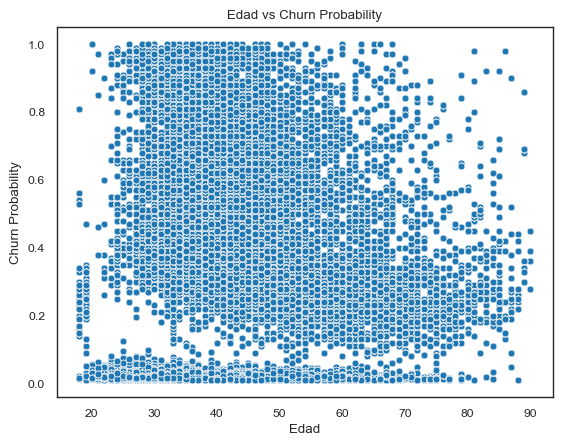

In [ ]:
sns.scatterplot(data=donantes_transacciones, x="Edad", y="Churn Probability")
plt.title("Edad vs Churn Probability");

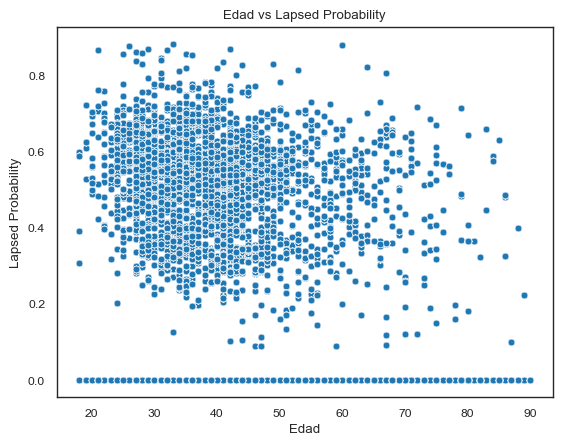

In [ ]:
sns.scatterplot(data=donantes_transacciones, x="Edad", y="Lapsed Probability")
plt.title("Edad vs Lapsed Probability");